In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
data=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Vizualizing frequency of each feature in dataset**

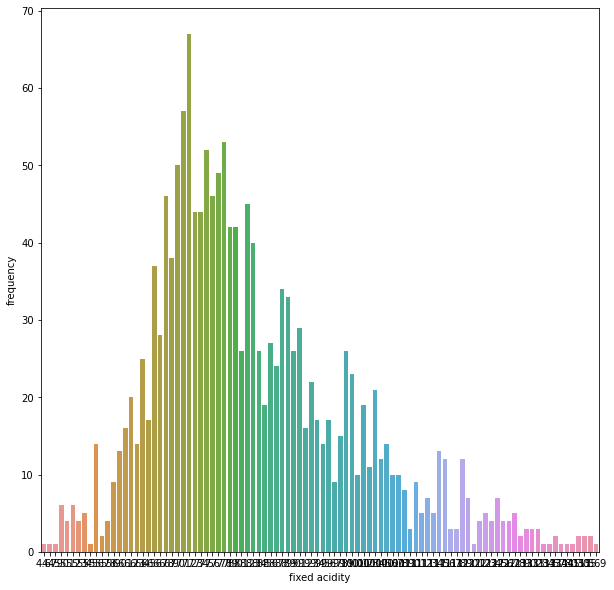

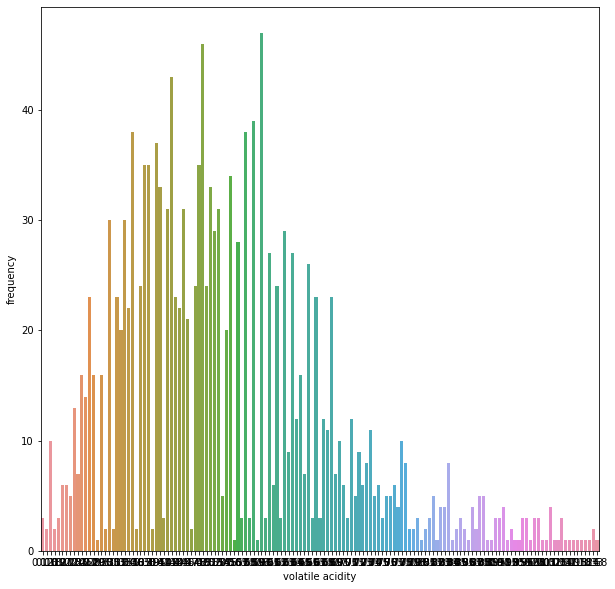

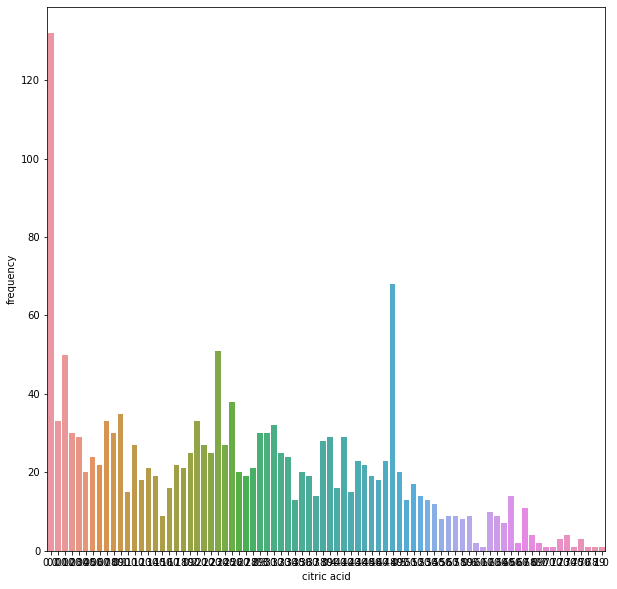

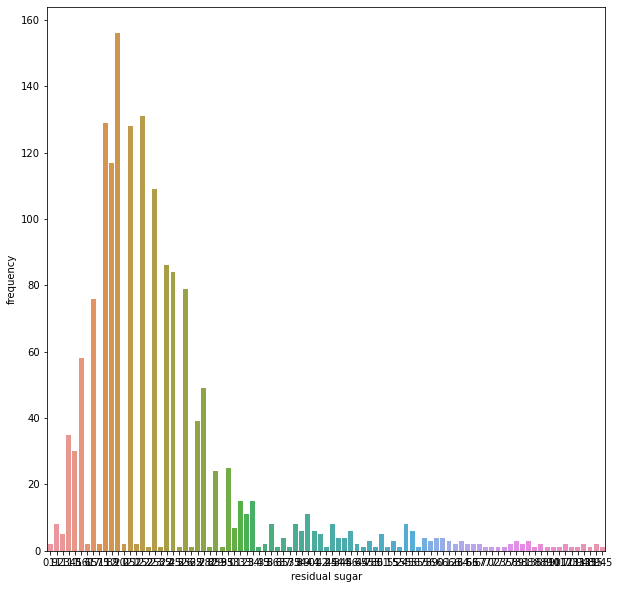

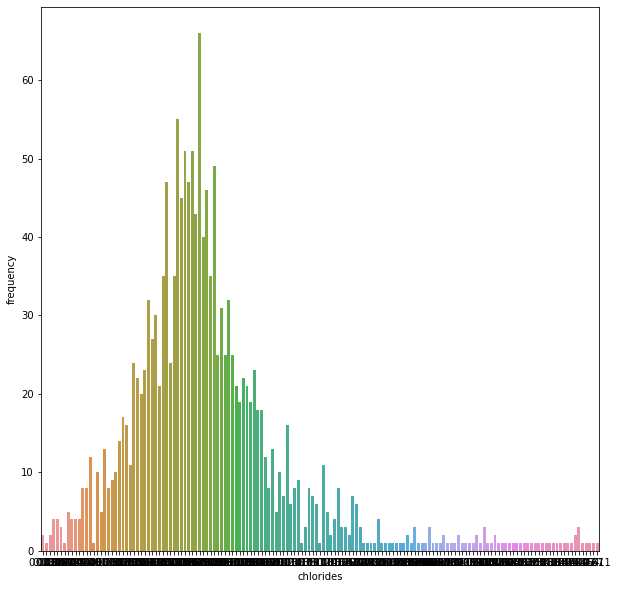

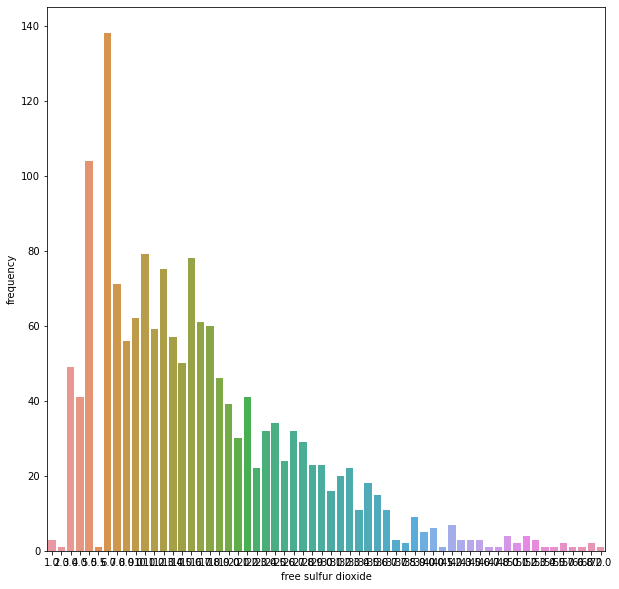

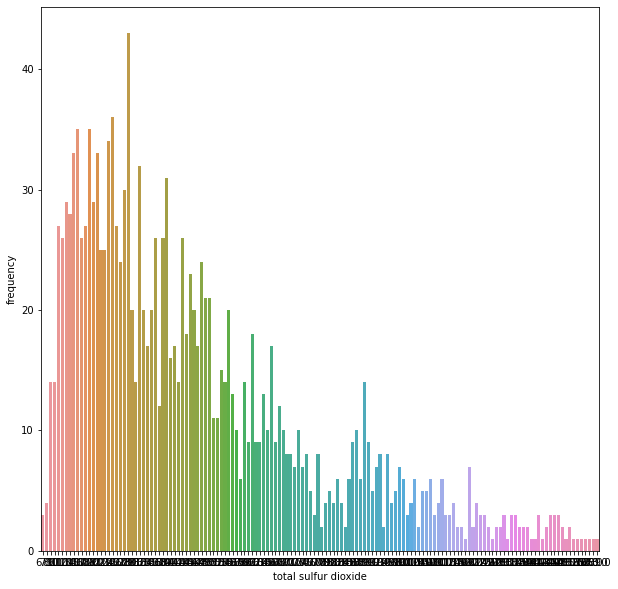

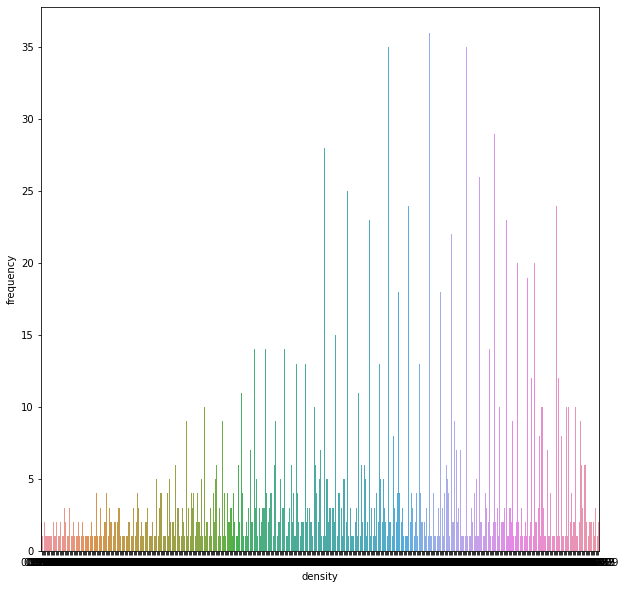

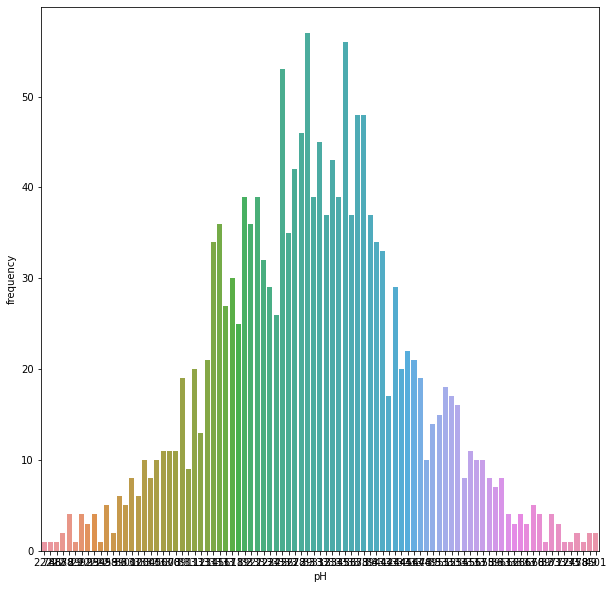

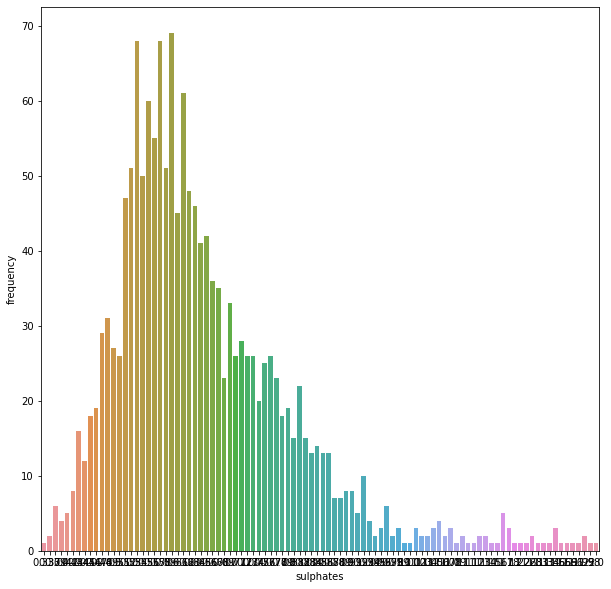

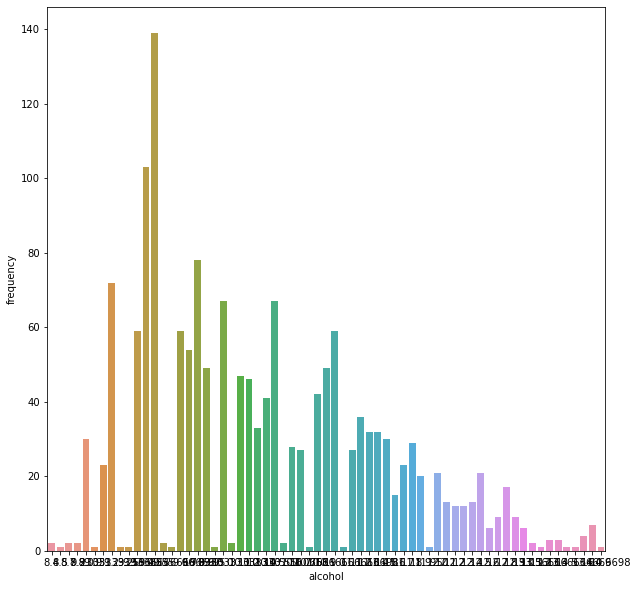

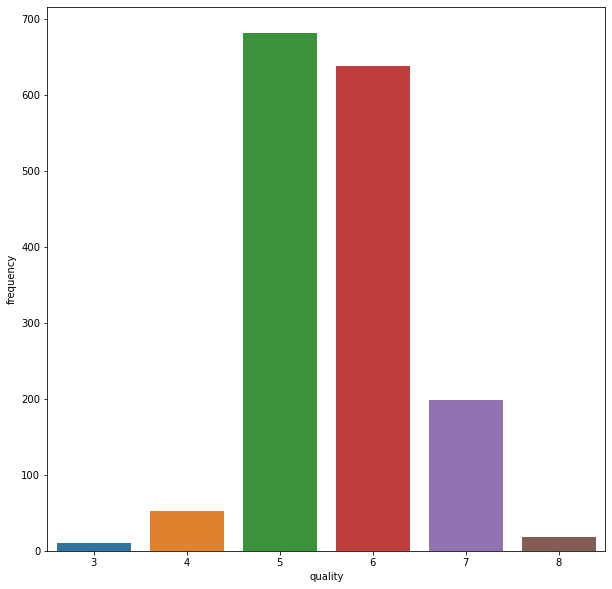

In [4]:
def value_count(v):
    x=data[v]
    x_cou=x.value_counts()
    plt.figure(figsize=(10,10))
    sns.barplot(x=x_cou.index,y=x_cou.values)
    plt.xlabel(v)
    plt.ylabel('frequency')
    plt.show()
    
for i in data.columns:
    value_count(i)

# **Creating bins to classify data**

In [5]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

# **Encoding the target**

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['quality']=le.fit_transform(data['quality'])

# **Scaling the features**

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(data.drop('quality',axis=1))

# **Separating features and target datasets**

In [8]:
xscpd=pd.DataFrame(xsc)
y=data['quality']

In [9]:
xscpd.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


# **Splitting the dataset and traning classifiers**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
xtr,xte,ytr,yte=train_test_split(xscpd,y,random_state=42, test_size=0.3)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(xtr,ytr)
yptr=rfc.predict(xtr)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

# **Results for traning data**

In [13]:
print(classification_report(ytr,yptr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       1.00      1.00      1.00       150

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



# **Wow, our model remembers it all!**

In [14]:
print(confusion_matrix(ytr,yptr))

[[969   0]
 [  0 150]]


# *Reports on test data*

In [15]:
ypte=rfc.predict(xte)
print(confusion_matrix(yte,ypte))

[[396  17]
 [ 34  33]]


In [16]:
print(classification_report(yte,ypte))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       413
           1       0.66      0.49      0.56        67

    accuracy                           0.89       480
   macro avg       0.79      0.73      0.75       480
weighted avg       0.88      0.89      0.89       480



# **Using next model**

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [18]:
svc=SVC()
svc.fit(xtr,ytr)
ypxte=svc.predict(xte)

In [19]:
print(confusion_matrix(yte,ypxte))

[[403  10]
 [ 46  21]]


In [20]:
print(classification_report(yte,ypxte))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       413
           1       0.68      0.31      0.43        67

    accuracy                           0.88       480
   macro avg       0.79      0.64      0.68       480
weighted avg       0.87      0.88      0.86       480



# **SVC is almost same as RandomforestClassifier**

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dct=DecisionTreeClassifier()

In [23]:
dct.fit(xtr,ytr)
ypre=dct.predict(xte)
print(confusion_matrix(yte,ypre))


[[366  47]
 [ 23  44]]


In [24]:
print(classification_report(yte,ypre))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       413
           1       0.48      0.66      0.56        67

    accuracy                           0.85       480
   macro avg       0.71      0.77      0.73       480
weighted avg       0.88      0.85      0.86       480



# **Searchng best parameters for decisionTreeClassifier**

In [25]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=DecisionTreeClassifier(),
                param_grid={'criterion':['gini', 'entropy'],
                           'splitter':['best', 'random'],
                           'max_depth':[0,3,6,9,12,15,18,21,24,27,30],
                           'min_samples_split':[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44],
                           'max_features':['auto', 'sqrt', 'log2']
                           },
                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [26]:
gsc.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0, 2, 4, 6, 8, 10, 12, 14, 16,
                                               18, 20, 22, 24, 26, 28, 30, 32,
                                               34, 36, 38, 40, 42, 44],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [27]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_split': 38,
 'splitter': 'best'}

In [28]:
gsc.best_score_

-0.1027426329276105

# *Using best parameters to predict test data*

In [29]:
dct2=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=6,
 max_features= 'auto',
 min_samples_split= 38,
 splitter= 'best')

In [30]:
dct2.fit(xtr,ytr)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',
                       min_samples_split=38)

In [31]:
ypre2=dct2.predict(xte)

In [32]:
print(confusion_matrix(yte,ypre2))

[[390  23]
 [ 49  18]]


In [33]:
print(classification_report(yte,ypre2))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       413
           1       0.44      0.27      0.33        67

    accuracy                           0.85       480
   macro avg       0.66      0.61      0.62       480
weighted avg       0.83      0.85      0.83       480



In [34]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtr,ytr)
ypre3=svc.predict(xte)
print(confusion_matrix(yte,ypre3))

[[403  10]
 [ 46  21]]


In [35]:
print(classification_report(yte,ypre3))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       413
           1       0.68      0.31      0.43        67

    accuracy                           0.88       480
   macro avg       0.79      0.64      0.68       480
weighted avg       0.87      0.88      0.86       480



# Tuning svc model

In [36]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,2,5,10,15,20],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,2,3]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)

In [37]:
grid_svc.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 2, 5, 10,
                               15, 20],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 2, 3],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [38]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 0.9, 'kernel': 'rbf'}

In [39]:
svc=SVC(C=1.4, gamma= 0.9, kernel= 'rbf')

In [40]:
svc.fit(xtr,ytr)

SVC(C=1.4, gamma=0.9)

In [41]:
ypre4=svc.predict(xte)

In [42]:
print(classification_report(yte,ypre4))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       413
           1       0.71      0.45      0.55        67

    accuracy                           0.90       480
   macro avg       0.81      0.71      0.75       480
weighted avg       0.89      0.90      0.89       480



# # *Wow. Recall went upto 90%*
# ---------------------Bye Bye!!----------------------------